# Simulation Gradient-Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [2]:
import sys
sys.path.append("../")
from myMLStudy.MyGradientLinearRegression import *
from myMLStudy.MyStoGradientLinearRegression import *

In [3]:
plot_x = np.linspace(-1.5,6.5,100)
plot_y = (plot_x - 2.5) ** 2 - 1

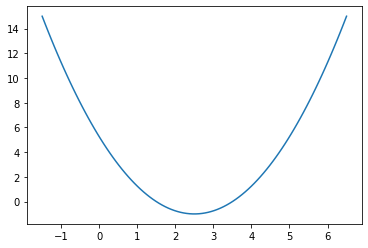

In [4]:
plt.plot(plot_x, plot_y)

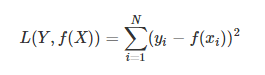

In [5]:
def J(theta):
    try:
        return (theta - 2.5) ** 2 -1
    except:
        return float("inf")

def dJ(theta):
    return 2 * (theta - 2.5)

def gradient_descent(theta, eta, epsilon, n_iters):
    i_iter = 0
    while i_iter < n_iters:
        history_theta.append(theta)
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        if abs(J(theta) - J(last_theta)) < epsilon:
            break
        i_iter = i_iter + 1
        
    return theta

def plt_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(history_theta), J(np.array(history_theta)), marker='+', color="r")
    plt.show()

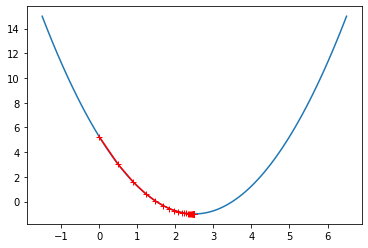

In [6]:
history_theta = []
gradient_descent(theta=0.0, eta=0.1, epsilon=1e-8, n_iters=1e4)
plt_history()

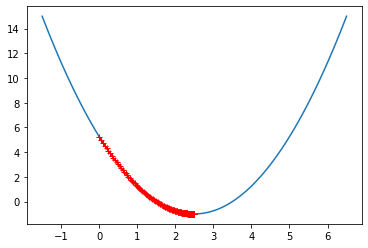

In [7]:
history_theta = []
gradient_descent(theta=0.0, eta=0.01, epsilon=1e-8, n_iters=1e4)
plt_history()

In [8]:
history_theta = []
gradient_descent(theta=0.0, eta=1.1, epsilon=1e-8, n_iters=1e4)

nan

In [9]:
len(history_theta)

10000

# Gradient-Descent in Linear Regression

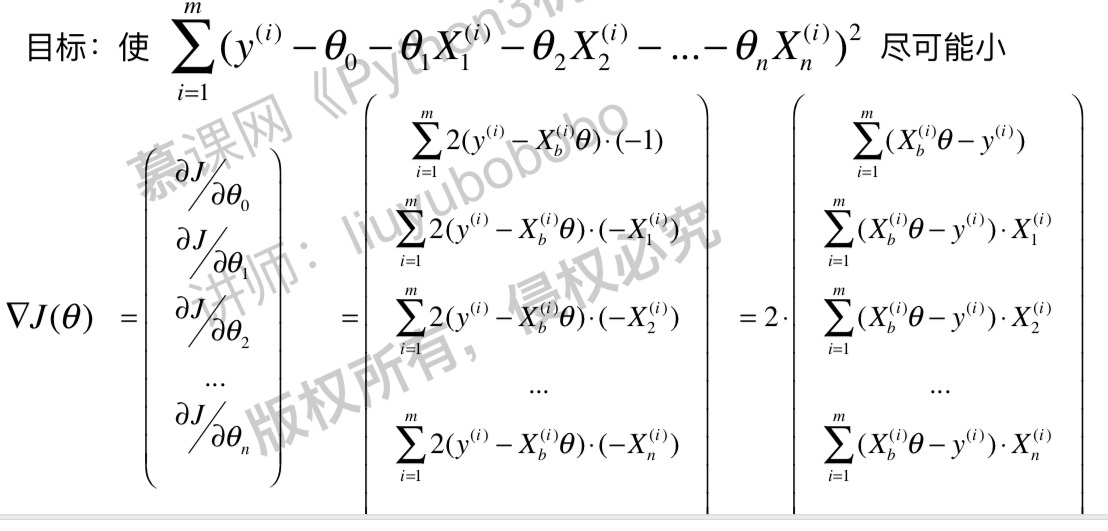

In [10]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)

def dJ(theta, X_b, y):
    res = np.empty(X_b.shape[1])
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, X_b.shape[1]):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

def gradient_descent(X_b, y, theta, eta, epsilon, n_iters):
    i_iter = 0
    while i_iter < n_iters:
        last_theta = theta
        gradient = dJ(theta, X_b, y)
        theta = theta - eta* gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_iter = i_iter + 1
    return theta

In [11]:
bostons = datasets.load_boston()
X, y = bostons.data, bostons.target

In [12]:
X_rm = X[:, 5]
X_rm = X_rm[y < 50.0]
y = y[y < 50.0]

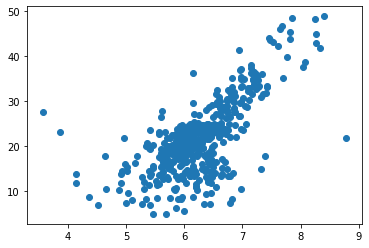

In [13]:
plt.scatter(X_rm, y)

In [14]:
X_b = np.hstack((np.ones(shape=(len(X_rm), 1)), X_rm.reshape(-1, 1)))
theta = np.zeros(shape=(X_b.shape[1]))
theta = gradient_descent(X_b, y, theta, eta=0.02, epsilon=1e-8, n_iters=1e4)
theta

array([-29.55332729,   8.19697996])

In [15]:
plot_x = np.linspace(3, 9, 100)
plot_y = theta[0] + theta[1] * plot_x

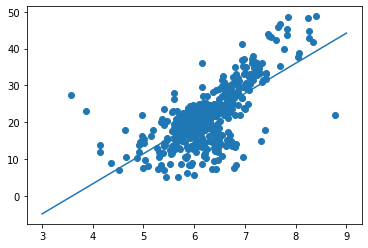

In [16]:
plt.scatter(X_rm, y)
plt.plot(plot_x, plot_y)
plt.show()

## sklearn

In [17]:
linear = LinearRegression()
linear.fit(X_rm.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
linear.coef_, linear.intercept_

(array([8.26855732]), -30.00512014537584)

# Vectorize Gradient Descent

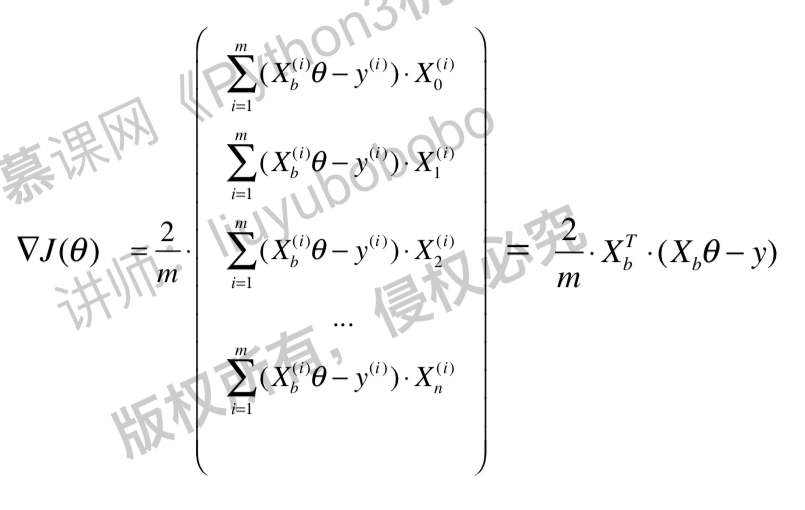

In [19]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)

def dJ_vect(theta, X_b, y):
    res = X_b.T.dot(X_b.dot(theta) - y)
    return res * 2 / len(X_b)

def gradient_descent_vect(X_b, y, theta, eta, epsilon, n_iters):
    i_iter = 0
    while i_iter < n_iters:
        last_theta = theta
        gradient = dJ_vect(theta, X_b, y)
        theta = theta - eta* gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_iter = i_iter + 1
    return theta

In [20]:
X_b = np.hstack((np.ones(shape=(len(X_rm), 1)), X_rm.reshape(-1, 1)))
theta = np.zeros(shape=(X_b.shape[1]))
theta = gradient_descent_vect(X_b, y, theta, eta=0.02, epsilon=1e-8, n_iters=1e4)
theta

array([-29.55332729,   8.19697996])

## Implement

In [21]:
X, y = bostons.data, bostons.target
X = X[y < 50.0]
y = y[y < 50.0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [23]:
X_train.shape, y_train.shape

((392, 13), (392,))

In [24]:
mygradientLinear = MyGradientLinearRegression()
mygradientLinear.fit(X_train, y_train, eta=0.0000001)

MyGradientLinearRegression()

In [25]:
mygradientLinear.score(X_test, y_test)

0.09905050111174063

### standscaler

In [26]:
standard = StandardScaler()
standard.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_standard = standard.transform(X_train)
X_test_standard = standard.transform(X_test)

In [28]:
mygradientLinear = MyGradientLinearRegression()
mygradientLinear.fit(X_train_standard, y_train)

MyGradientLinearRegression()

In [29]:
mygradientLinear.score(X_test_standard, y_test)

0.8129818717189805

## Stochastic-Gradient-Descent

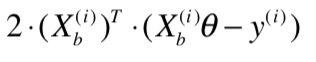

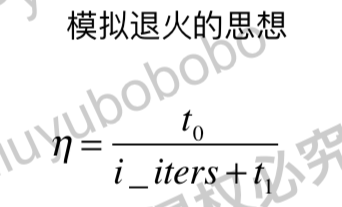

In [30]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)

def dJ_sgd(theta, X_b_i, y_i):
    res = X_b_i.T.dot(X_b_i.dot(theta) - y_i)
    return res * 2

def gradient_descent_sgd(X_b, y, initial_theta, n_iters):
    cur_iter = 0
    t0, t1 = 5, 50
    m = len(X_b)
    theta = initial_theta
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    for cur_iter in range(n_iters):
        indexs = np.random.permutation(m)
        X_b_new = X_b[indexs]
        y_new = y[indexs]
        
        for i in range(m):
            gradient = dJ_sgd(theta, X_b_new[i], y_new[i])
            theta = theta - learning_rate(cur_iter*m + i) * gradient
            cur_iter = cur_iter + 1
        
    return theta

In [31]:
X, y = bostons.data, bostons.target
X_rm = X[:, 5]
X_rm = X_rm[y < 50.0]
y = y[y < 50.0]

In [32]:
X_b = np.hstack((np.ones(shape=(len(X_rm), 1)), X_rm.reshape(-1, 1)))
theta = np.zeros(shape=(X_b.shape[1]))

In [33]:
%time gradient_descent_sgd(X_b, y, theta, n_iters=len(X_b)*5)

CPU times: user 8.86 s, sys: 64.4 ms, total: 8.92 s
Wall time: 9.3 s


array([-6.54160647,  4.55130729])

### Implement

In [34]:
sgdLinear = MyStoGradientLinearRegression()

In [35]:
sgdLinear.fit(X_train_standard, y_train, n_iters=20)
sgdLinear.score(X_test_standard, y_test)

0.8099450057437003

In [36]:
sgdLinear.fit(X_train_standard, y_train, n_iters=100)
sgdLinear.score(X_test_standard, y_test)

0.8117503677809647

### sklearn

In [37]:
sgd = SGDRegressor()
sgd.fit(X_train_standard, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [38]:
sgd.score(X_test_standard, y_test)

0.8124258812250331

In [39]:
np.random.randn(3)

array([-1.04694164, -1.17847488,  1.64779017])

## Debug Gradient

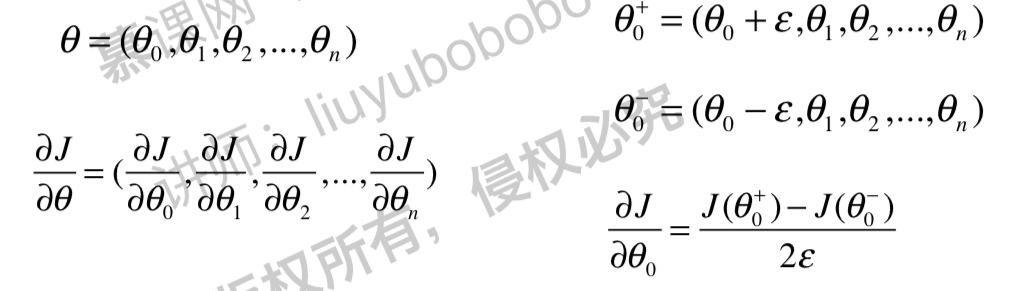

In [40]:
deb_X = np.random.random(size=(100000,10))
deb_theta = np.arange(1,12)

In [41]:
deb_X_b = np.hstack((np.ones(shape=(len(deb_X), 1)), deb_X))
deb_y = deb_X_b.dot(deb_theta) + np.random.normal(size=(100000))

In [42]:
def J(theta, X_b, y):
    return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)

def dJ_math(theta, X_b, y):
    res = X_b.T.dot(X_b.dot(theta) - y)
    return res * 2 / len(X_b)

def dJ_debug(theta, X_b, y, epsilon=0.0001):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_2 = theta.copy()
        theta_1[i] = theta_1[i] - epsilon
        theta_2[i] = theta_2[i] + epsilon
        res[i] = (J(theta_2, X_b, y) - J(theta_1, X_b, y)) / (2 * epsilon)
    
    return res

def gradient_descent(dJ, X_b, y, theta, eta=0.01, epsilon=1e-6, n_iters=1e4):
    i_iter = 0
    while i_iter < n_iters:
        last_theta = theta
        gradient = dJ(theta, X_b, y)
        theta = theta - eta* gradient
        if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        i_iter = i_iter + 1
    return theta

In [43]:
theta = np.empty(deb_X_b.shape[1])
%time gradient_descent(dJ_math, deb_X_b, deb_y, theta)

CPU times: user 10.5 ms, sys: 2.57 ms, total: 13.1 ms
Wall time: 8.47 ms


array([ 0.99999707,  2.00000207,  2.99999499,  4.00002299,  4.99997086,
        5.99996516,  6.99999159,  7.99998994,  8.99998008, 10.00001088,
       10.9999806 ])

In [44]:
theta = np.empty(deb_X_b.shape[1])
%time gradient_descent(dJ_debug, deb_X_b, deb_y, theta)

CPU times: user 51.6 ms, sys: 2.84 ms, total: 54.4 ms
Wall time: 30.8 ms


array([ 0.99999511,  2.00000463,  2.99999046,  4.00004643,  4.99994226,
        5.99993086,  6.99998367,  7.99998038,  8.99996068, 10.00002223,
       10.99996172])